In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('data/metric_means.csv', index_col=0)
df = df.drop(columns=['crosswind_speed'])
df = df.dropna()
print(df.describe())

          n_geese    n_frames  normalized_velocity_alignment  \
count  164.000000  164.000000                     164.000000   
mean    23.591463  502.000000                       0.997233   
std     15.532990  147.988642                       0.005002   
min      2.000000   33.000000                       0.956286   
25%     12.000000  423.750000                       0.997038   
50%     20.000000  501.500000                       0.998506   
75%     33.000000  600.000000                       0.999449   
max     70.000000  962.000000                       0.999961   

       normalized_velocity_alignment_std_dev  velocity_deviation  \
count                             164.000000          164.000000   
mean                                0.001478            0.987594   
std                                 0.002778            0.651732   
min                                 0.000026            0.152738   
25%                                 0.000275            0.529593   
50%            

In [3]:
def show_correlation(df: pd.DataFrame, feature_1: str, feature_2: str):
    
    fig = plt.figure(figsize=(7, 7))
    sns.regplot(df,
    x=feature_1,
    y=feature_2,
    )

    r, p = pearsonr(df[feature_1], df[feature_2])
    print(r, p)
    r, p = np.round((r, p), 3)
    plt.title(f"Regression plot: {feature_1} vs {feature_2} (r={r}, p={p})")

    plt.grid(color='lightgrey')
    plt.tight_layout()
    plt.show()
    

In [4]:
def show_correlations(df: pd.DataFrame, target_feature: str, features: list):
    """
    Show regression plots and correlation coefficients between one chosen feature
    and all other numeric features in the dataframe.
    """
    # Select numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove the target feature itself
    n_features = len(features)
    if n_features == 0:
        print("No other numeric columns to correlate with.")
        return

    # --- Determine subplot grid size dynamically ---
    n_cols = 2
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 6 * n_rows))
    axes = axes.flatten()  # flatten for easy iteration

    # --- Loop through all features and plot ---
    for i, feature in enumerate(features):
        ax = axes[i]

        if feature != 'n_frames' and feature != 'n_geese':
            # Draw error bars (Matplotlib)
            ax.errorbar(
                df[target_feature],
                df[feature],
                yerr=df[feature + '_std_dev'],
                fmt='o',
                markerfacecolor='steelblue',
                markeredgecolor='black',
                ecolor='black',
                elinewidth=1,
                alpha=0.8,
                capsize=3,
                label='Mean ± SD'
                )

        # draw points and regression plot
        sns.regplot(
            data=df,
            x=target_feature,
            y=feature,
            ax=ax,
            scatter_kws={"alpha": 0.8},
            line_kws={"color": "red", 'alpha': 0.8},
        )

        # Compute correlation
        r, p = pearsonr(df[target_feature], df[feature])
        r, p = np.round((r, p), 3)

        ax.set_title(f"{feature} vs {target_feature}\n(r={r}, p={p})")
        ax.grid(color="lightgrey")

        ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
        ax.tick_params(length=0)

    # Hide empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [5]:
features = [
    'n_frames',
    "normalized_velocity_alignment",
    "velocity_deviation",
    "sidewise_acceleration_deviation",
    "longitudinal_acceleration_deviation",
    "first_pca_component",
    "second_pca_component",
    "first_pca_component_velocity_alignment",
    "second_pca_component_velocity_alignment",
]

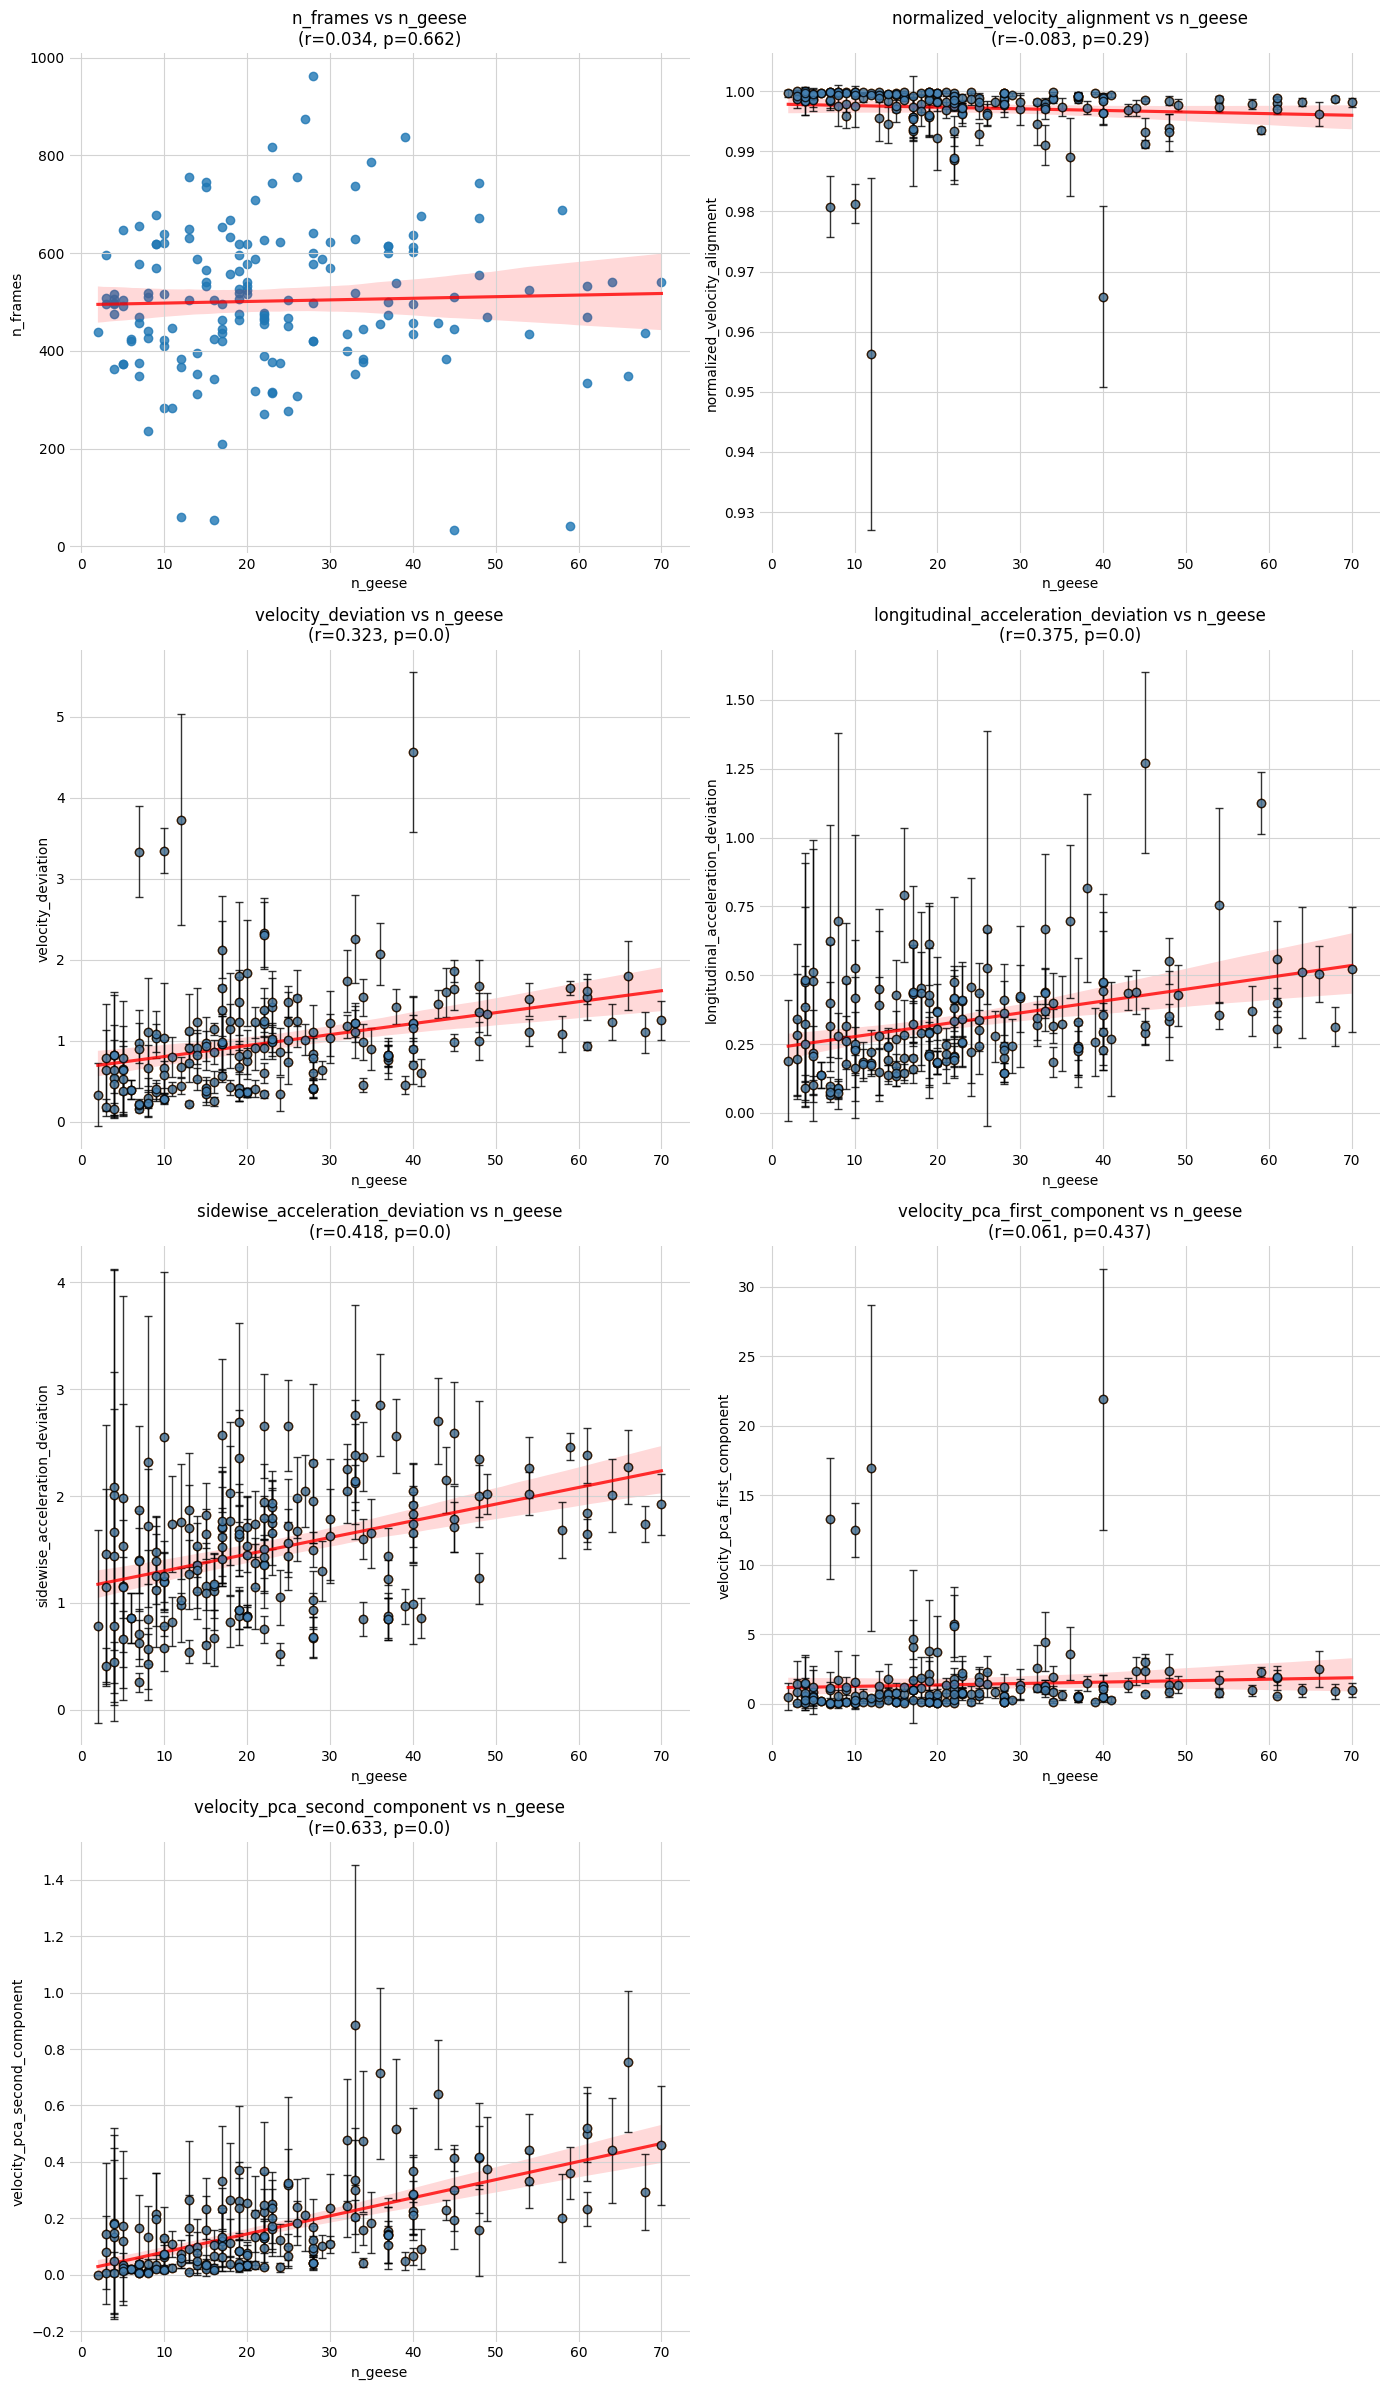

In [6]:
show_correlations(df, 'n_geese', features)

In [7]:
print(f'Dropping {len(df[df['n_frames'] <= 100])} data_points out of {len(df)}')
df = df[df['n_frames'] > 100]

Dropping 4 data_points out of 164


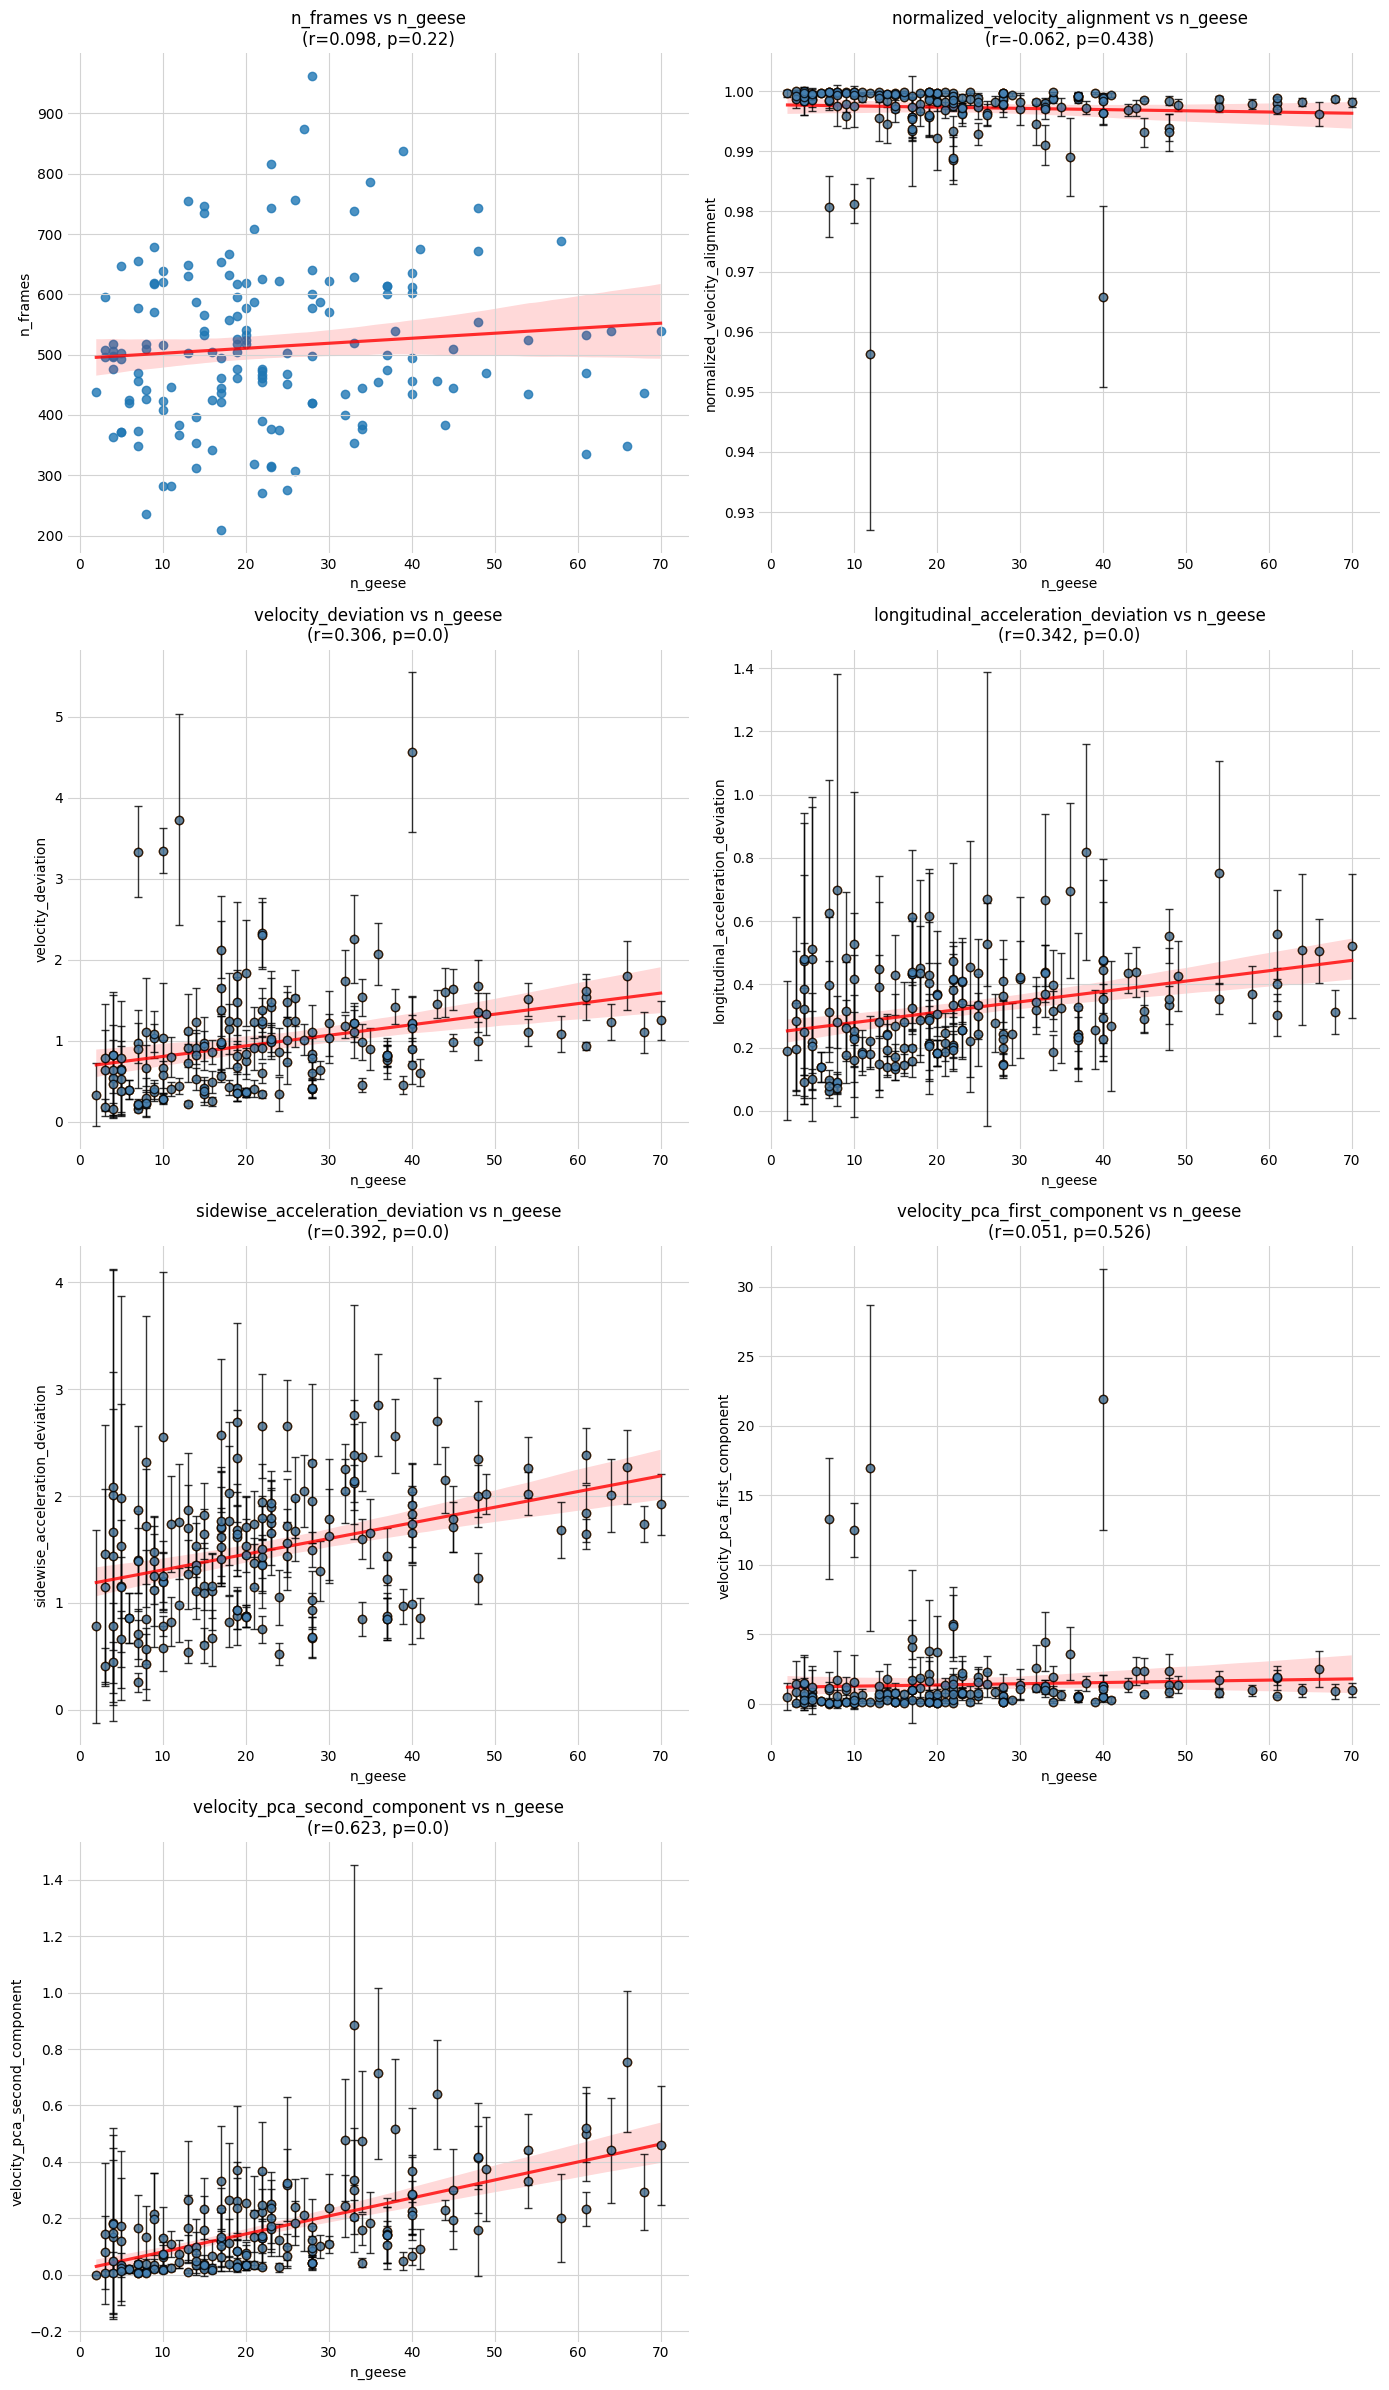

In [8]:
show_correlations(df, 'n_geese', features)

In [11]:
df = pd.read_csv('data/metric_means.csv', index_col=0)
df = df.dropna()

In [12]:
data_metrics = [
    "n_geese",
    "n_frames",
    "normalized_velocity_alignment",
    "velocity_deviation",
    "sidewise_acceleration_deviation",
    "longitudinal_acceleration_deviation",
    "first_pca_component",
    "second_pca_component",
    "first_pca_component_velocity_alignment",
    "second_pca_component_velocity_alignment",
]

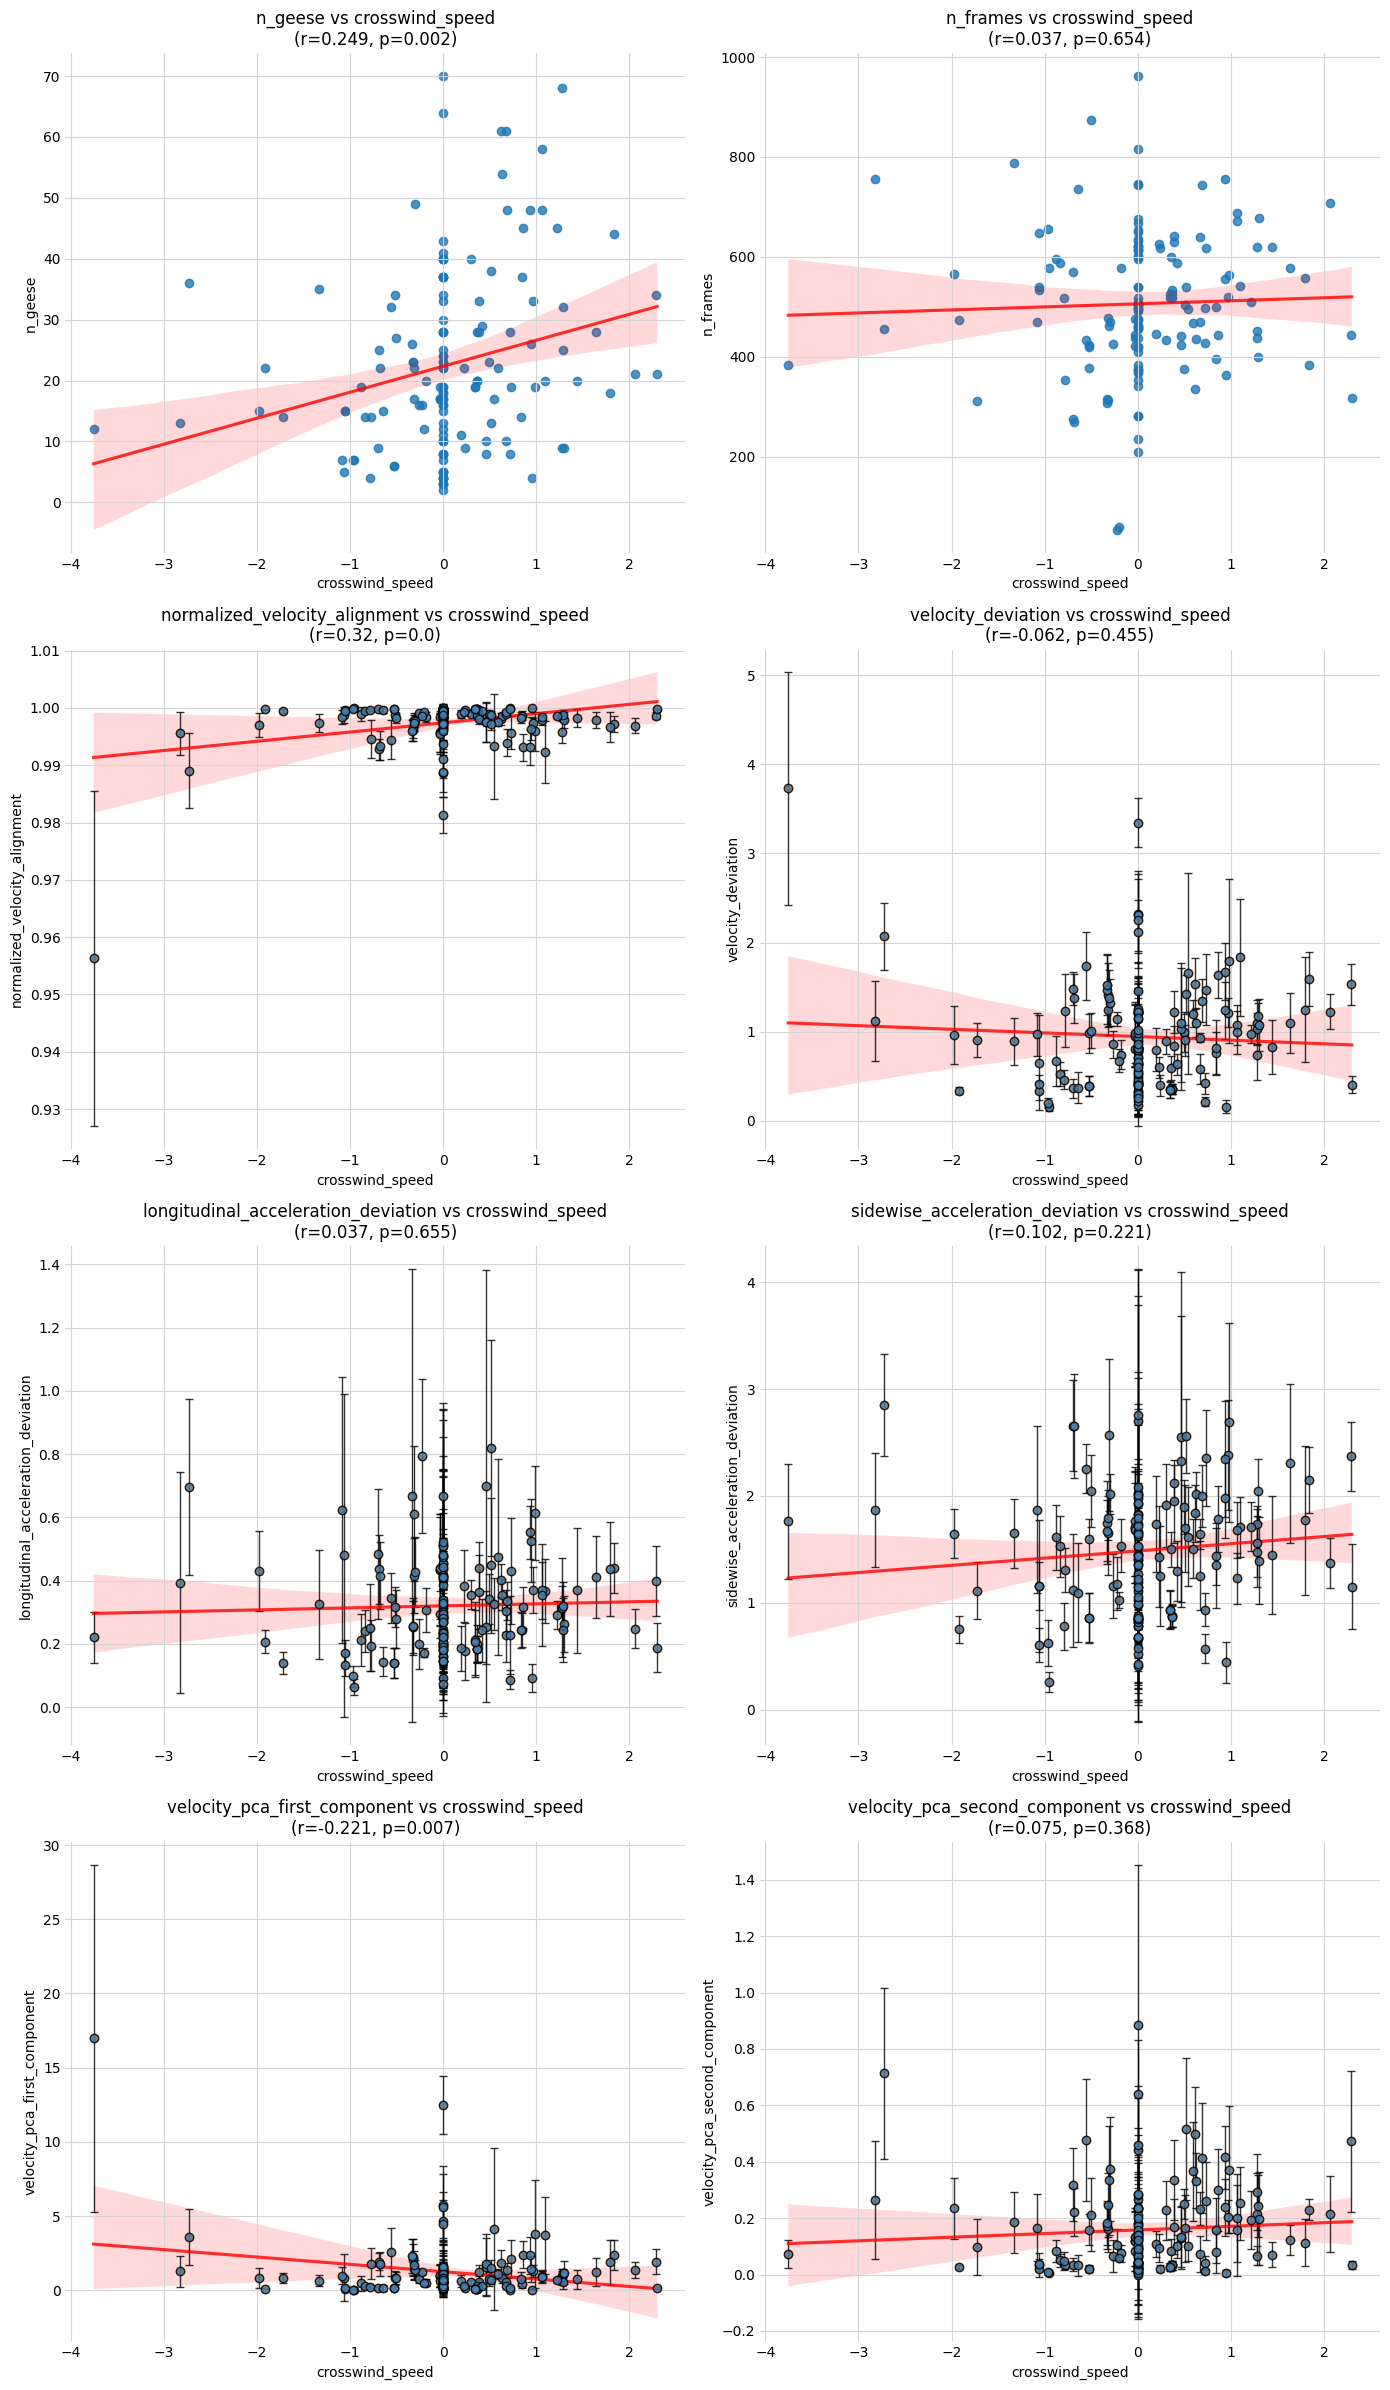

In [13]:
show_correlations(df, 'crosswind_speed', features)

In [14]:
print(f'Dropping {len(df[df['n_frames'] <= 100])} data_points out of {len(df)}')
df = df[df['n_frames'] > 100]

Dropping 2 data_points out of 147


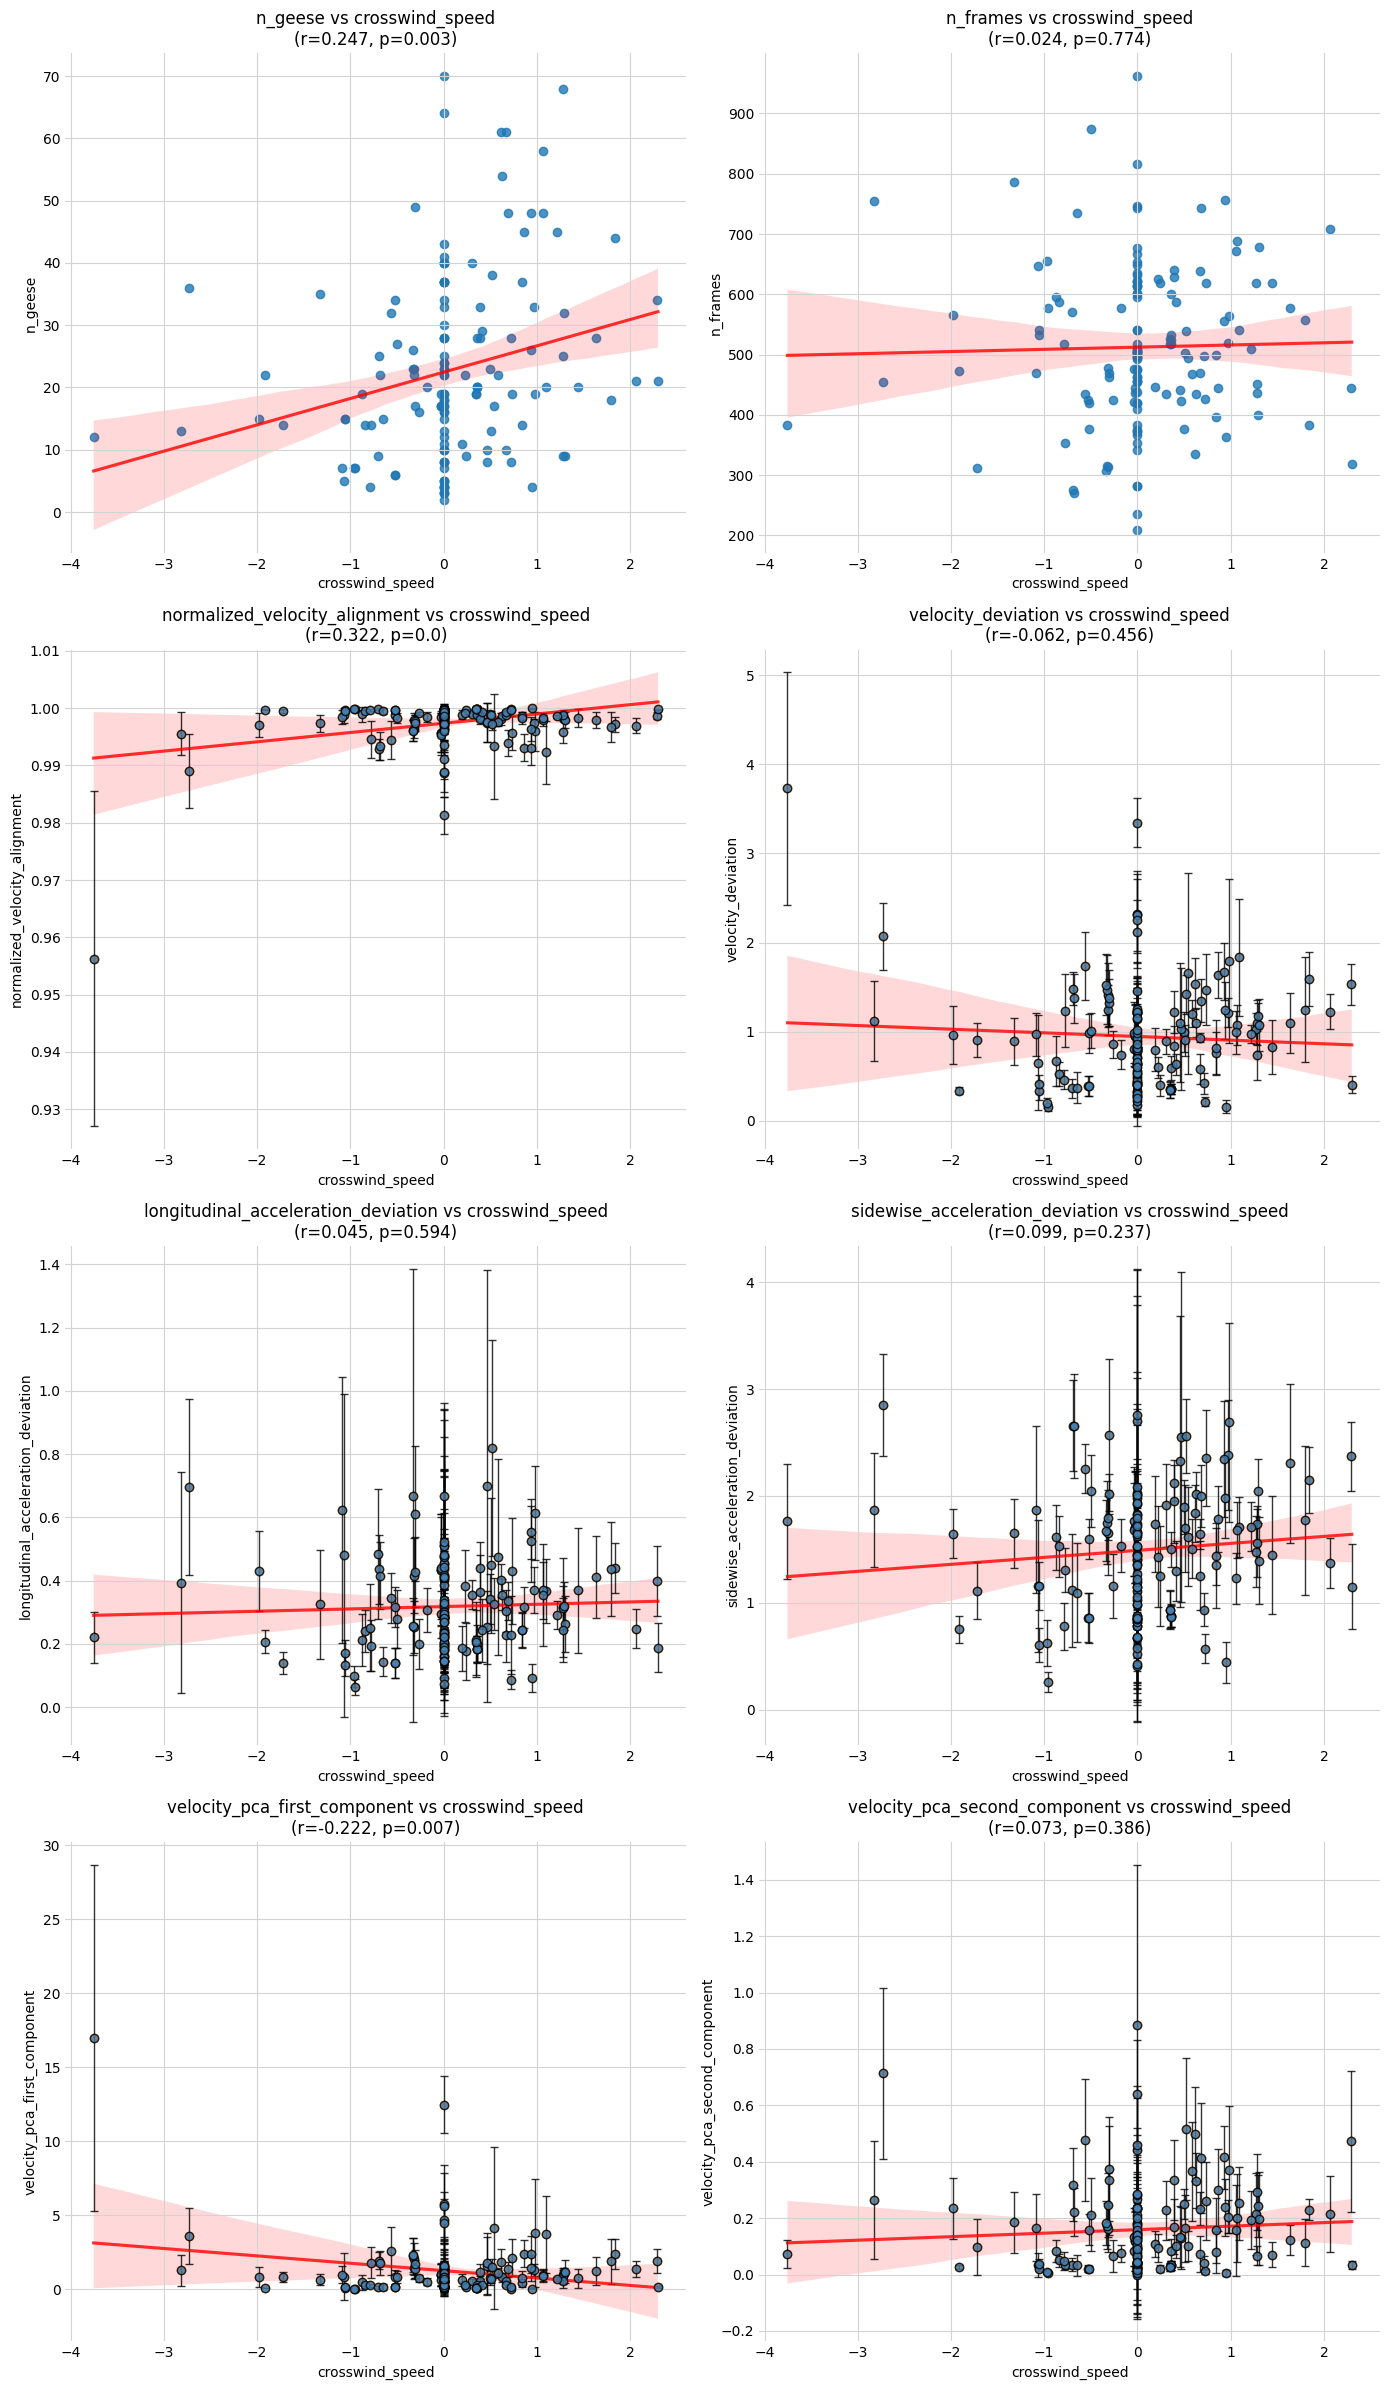

In [15]:
show_correlations(df, 'crosswind_speed', features)

In [16]:
df = pd.read_csv('data/metric_means.csv', index_col=0)
df = df.dropna()
df['abs_crosswind_speed'] = np.abs(df['crosswind_speed'])
df = df[df['crosswind_speed'] != 0]

In [17]:
data_metrics = [
    "n_geese",
    "n_frames",
    "normalized_velocity_alignment",
    "velocity_deviation",
    "sidewise_acceleration_deviation",
    "longitudinal_acceleration_deviation",
    "first_pca_component",
    "second_pca_component",
    "first_pca_component_velocity_alignment",
    "second_pca_component_velocity_alignment",
]

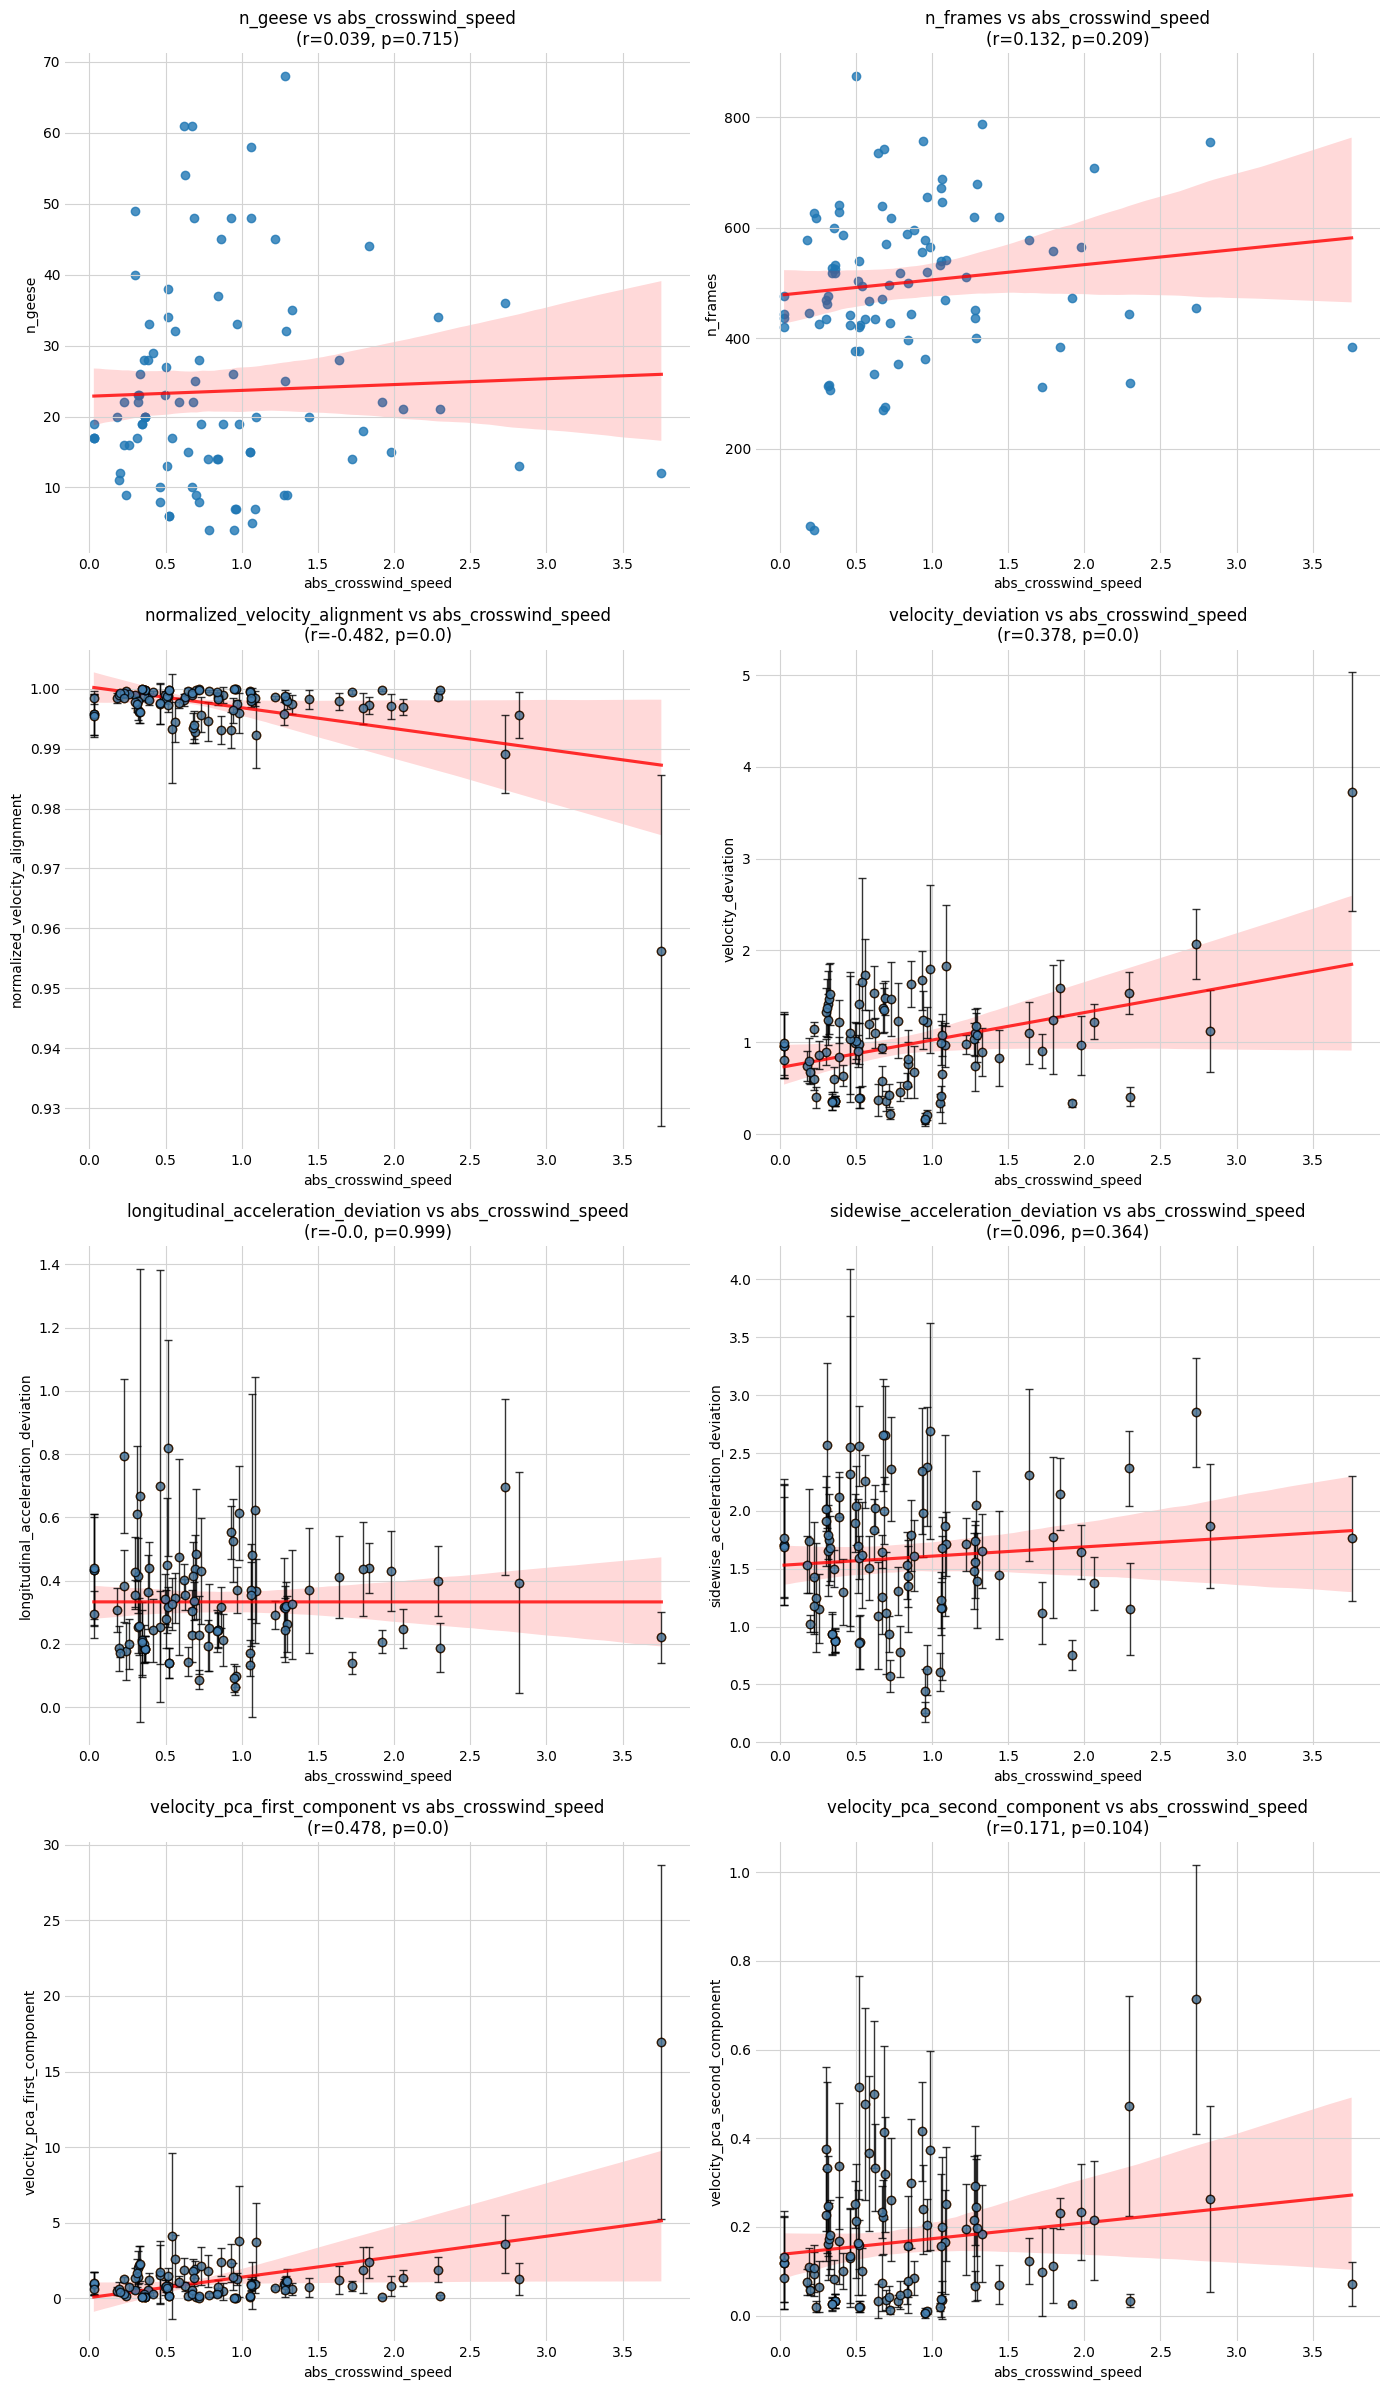

In [18]:
show_correlations(df, 'abs_crosswind_speed', features)

In [19]:
print(f'Dropping {len(df[df['n_frames'] <= 100])} data_points out of {len(df)}')
df = df[df['n_frames'] > 100]

Dropping 2 data_points out of 92


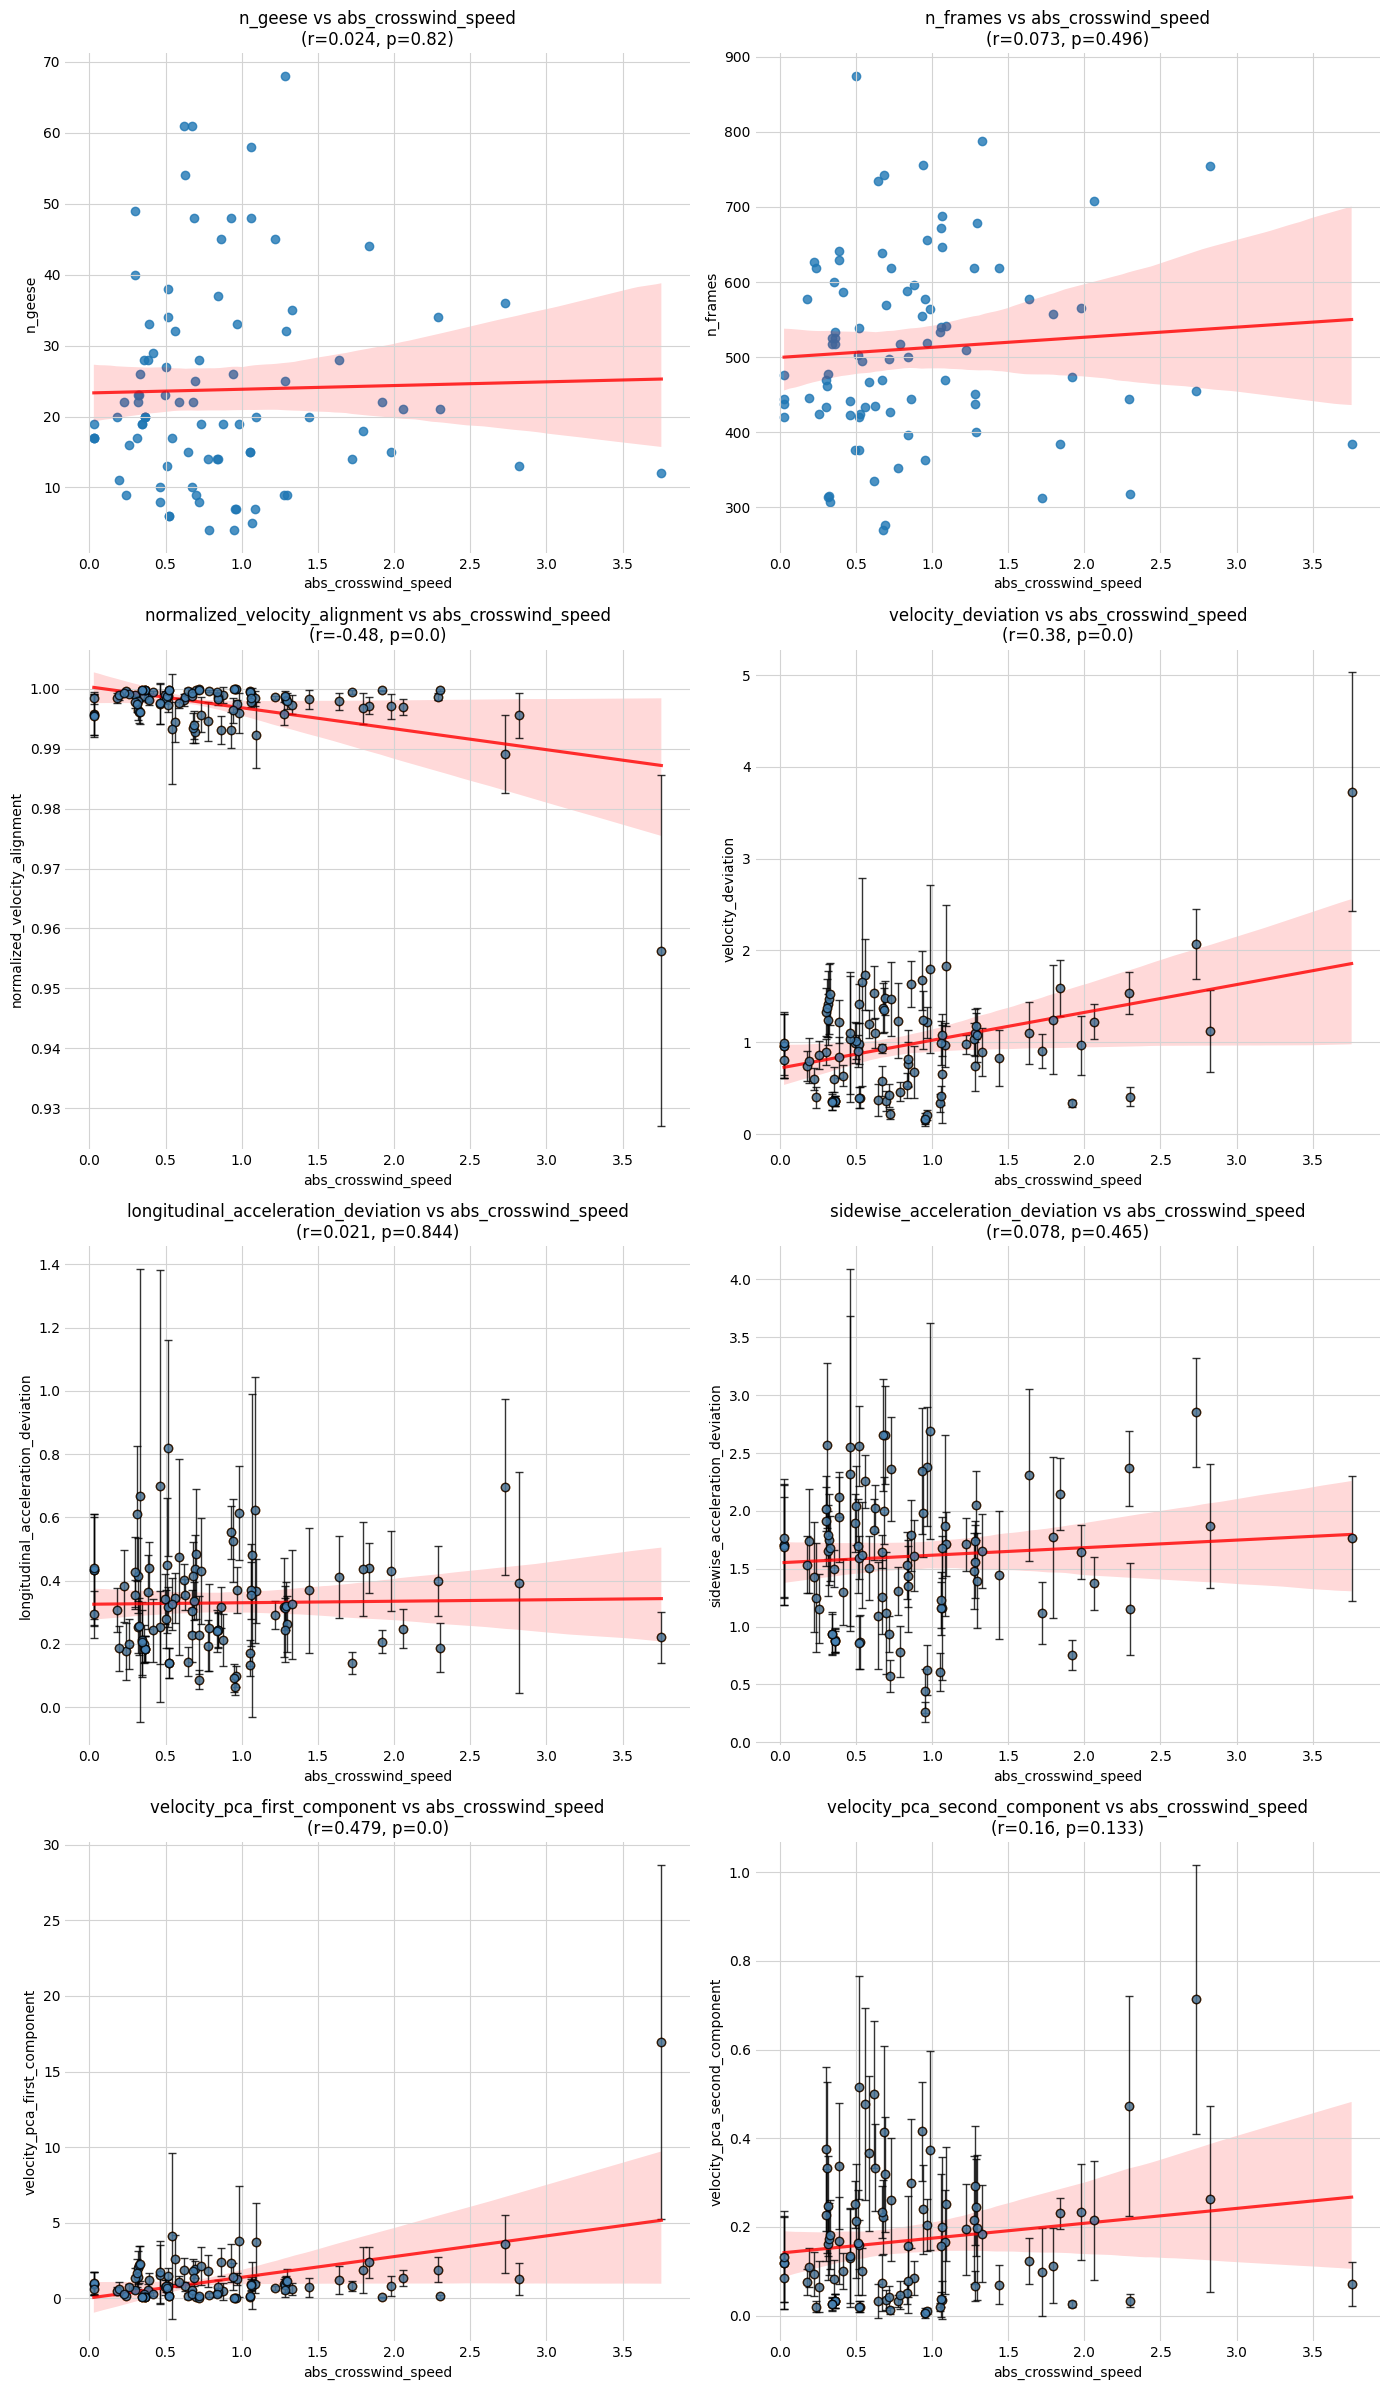

In [20]:
show_correlations(df, 'abs_crosswind_speed', features)

PLOT STANDARD DEVIATIONS AS ANOTHER METRIC!